# Домашнее задание №2

Задание выполнил(а): Олег Голещихин

### Общая информация

__Дата выдачи:__ 29.12.2020

__Дедлайн:__ 17.01.2021 23:59

# О задании

В этом домашнем задании вы реализуете градиентный спуск и стохастический градиентный спуск для обучения линейной регрессии, попрактикуетесь в анализе данных и их обработке, а также примените модели линейной регрессии на практике и проанализируете результаты.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.


### Оценивание и штрафы


#### Gradient Descent [8 баллов]
* [Задание 1](#task1) [1 балл]
* [Задание 2](#task2) [2 балла]
* [Задание 3](#task3) [3 балла]
* [Задание 4](#task4) [2 балла]

#### Linear Regression [8 баллов] + 2 бонусных
* [Задание 1](#task21) [1 балл]
* [Задание 2](#task22) [1 балл]
* [Задание 3](#task23) [1 балл]
* [Задание 4](#task24) [1 балл]
* [Задание 5](#task25) [1 балл]
* [Задание 6](#task26) [1 балл]
* [Задание 7](#task27) [1 балл]
* [Задание 8](#task28) [1 балл]
* [Задание 9](#task29) [2 баллa]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{16},$$ где $s$ - сумма набранных балов. С учетом бонусов, за домашнее задание можно получить > 10 балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/770). 

## Часть 1. Gradient Descent

Среднеквадратичная ошибка на всем датасете $(X, y) = \{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ для линейной регрессии с вектором весов $w$ (в предположении, что в данных есть единичный признак) представляется следующим образом:

$$
Q(w) = \frac{1}{\ell}\|Xw - y\|_2^2
$$

Градиент данного функционала потерь по $w$:

$$
\nabla_w Q(w) = \frac{2}{\ell}X^T(Xw - y)
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Для тестирования реализованных вами методов будет использоваться датасет о ценах домов из `sklearn`.

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# загружаем данные
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# делим данные на обучающую и тестовую часть
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

### Задание 1 <a id="task1"></a>

С линейной регрессией удобно работать в матрично-векторном виде, если предположить, что в данных есть единичный признак. Реализуйте функцию, которая принимает на вход матрицу объекты-признаки, и добавляет в нее столбец (первый), заполненный единицами. Примените написанную функцию к обучающей и тестовой части имеющихся данных.

Например, если на вход подается матрица 
$$
\begin{pmatrix}
2 & 4 & 4200\\
0 & 10 & 5000\\
2 & 2 & 1000\\
\end{pmatrix},
$$
то на выходе будет матрица
$$
\begin{pmatrix}
1 & 2 & 4 & 4200\\
1 & 0 & 10 & 5000\\
1 & 2 & 2 & 1000\\
\end{pmatrix}$$

**Hint** 
- Вам могут пригодиться функции `np.concatenate`, `np.ones`

In [3]:
# create function
def add_identity_feature(X):
    '''
    INPUT:
    X - np.array shape=(ℓ, d-1)
    
    OUTPUT:
    X - np.array shape=(ℓ, d)
    '''
    # your code here
    first_col = np.ones((X.shape[0], 1))
    X = np.concatenate((first_col, X), axis=1)
    return X

# apply to train and test
# your code here
X_train = add_identity_feature(X_train)
X_test = add_identity_feature(X_test)

In [4]:
# test yourself
assert X_train.shape == (354, 14)
assert len(X_train) == X_train.sum(axis=0)[0]

assert X_test.shape == (152, 14)
assert len(X_test) == X_test.sum(axis=0)[0]

### Задание 2 <a id="task2"></a>

Реализуйте подсчет среднеквадратичной функции потерь и ее градиента по весам. Формулы должны быть реализованы в явном виде с помощью `numpy`, без использования циклов `for`.

**Hint** 
- Для умножения матрицы на вектор (или матрицы на матрицу) можно использовать функцию `np.dot`. 
- Не забывайте, что оператор `*` используется только для поэлементного умножения.
- Также может пригодиться функция `np.linalg.norm`

In [5]:
def mse_loss(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    loss - scalar
    """
    
    # your code here
    loss = np.mean((np.dot(X, w) - y)**2)
    return loss


def mse_grad(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    grad - np.array shape=(d,)
    """

    # your code here
    grad = (2/X.shape[0])*(np.dot(X.T, (np.dot(X, w) - y)))
    return grad

Посчитайте `result_mse_sklearn` используя функцию `mean_squared_error` из sklearn, чтобы сравнить c результатом вашей функции

In [6]:
from sklearn.metrics import mean_squared_error

w = np.zeros(X_train.shape[1])

result_mse_custom = mse_loss(X_train, y_train, w)
result_mse_grad = mse_grad(X_train, y_train, w)

# your code here
result_mse_sklearn = mean_squared_error(y_train, X_train @ w)

assert (X_train @ w).shape == y_train.shape
assert np.allclose(result_mse_custom, result_mse_sklearn)
assert np.allclose(result_mse_grad, np.array([-43.9424,  -99.9887, -675.8766, -444.0919,   -3.0395,  
                                              -23.5569,   -282.6831,  -2829.3631,   -177.206 ,  -373.6983,
                                              -16820.8966,   -796.6377, -16136.5175,   -477.6308]),rtol=1e-03)

### Задание 3  <a id="task3"></a>

Реализуйте класс для линейной регрессии. Он должен поддерживать обучение с помощью градиентного спуска (метод `fit`) и предсказание для выборки (метод `predict`).

Метод `fit` должен возвращать список из значений функционала потерь на каждой итерации градиентного спуска. Напомним, что алгоритм градиентного спуска состоит из трех этапов:

1. **Инициализация.** В данном случае вектор весов вы можете инициализировать нулями.
2. **Шаг градиентного спуска.** Обновление весов с помощью антиградиента функционала потерь с заданной длиной шага (параметр `eta`). 
$$
w^{t+1} = w^t - \eta \nabla Q(w^t)
$$
Для того, чтобы нарисовать график зависимости значения функционала потерь от номера итерации, необходимо на каждом шаге запоминать значение функционала потерь (обновлять список `self.loss_history`). На этом этапе вы можете использовать уже реализованные вами функции `mse_loss` и `mse_grad` из предыдущего задания.

3. **Остановка.** В качестве критерия останова используйте $\|w^t - w^{t - 1}\| < \varepsilon$ (значение $\varepsilon$ задается параметром `tol`). В качестве дополнительного критерия останова используйте максимальное число итераций (параметр `max_iter`). Таким образом, даже если первый критерий не сработает, алгоритм все равно остановится после `max_iter` шагов.

In [7]:
class CustomLinearRegressionGD:
    def __init__(self):
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y, max_iter=100, tol=1e-6, eta=3e-6):
        """
        ARGUMENTS:
        max_iter - максимальное число шагов градиентного спуска
        tol - значение эпсилон для критерия останова
        eta - длина шага градиентного спуска (learning rate)
        X - np.array of shape (ℓ, d)
        y - np.array of shape (ℓ,)
        
        OUTPUT:
        loss_hist - list 
        """
        
        self.w = np.zeros(X.shape[1])
        self.loss_history = [mse_loss(X, y, self.w)]
        for t in range(max_iter):
            # your code here
            w0 = self.w
            self.w = self.w - eta * mse_grad(X, y, self.w)
            self.loss_history.append(mse_loss(X, y, self.w))
            if ((self.w - w0).T @ (self.w - w0)) < tol:
                break
        
        return self.loss_history
        
    def predict(self, X):
        """
        ARGUMENTS:
        X_test - np.array of shape (ℓ, d)
        
        OUTPUT:
        y_pred - np.array of shape (ℓ,)
        """
        # your code here
        y_pred = X @ self.w
        
        return y_pred

Проверьте работу вашего класса. 
- Обучите линейную регрессию на обучающей части выборки.
- Постройте график зависимости значения функционала потерь от итерации градиентного спуска. 
- Подберите вручную оптимальную длину шага градиентного спуска и посчитайте MSE на тестовой части с помощью функции `mean_squared_error` из `sklearn`. 
- Добейтесь того, чтобы значение MSE не превышало 100.

In [8]:
lr = CustomLinearRegressionGD()
# your code here
loss_history = lr.fit(X_train, y_train)

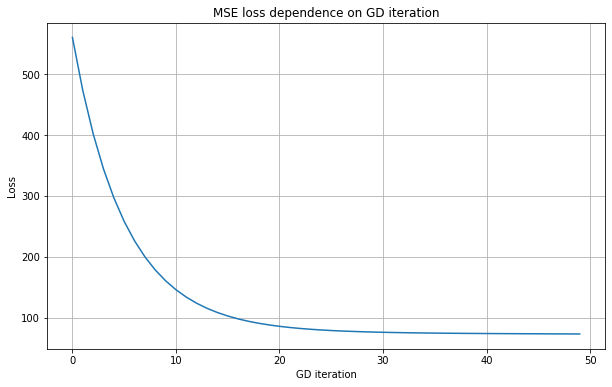

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [10]:
mse_test = mse_loss(X_test, y_test, lr.w)
print(mse_test)
assert len(loss_history) <= 1000
assert mse_test <= 100

92.78883467516758


In [11]:
# Посчитаем MSE на тестовой части с помощью функции mean_squared_error из sklearn
result_mse_sklearn = mean_squared_error(y_train, X_train @ lr.w)
result_mse_sklearn

72.99663739650764

### Задание 4 <a id="task4"></a>

Как известно, масштабирование данных может помочь в сходимости градиентного спуска (вспомните, почему). Отмасштабируйте имеющиеся данные с помощью мин-макс шкалирования:

$$
x^j = \frac{x^j - \min(x^j)}{\max(x^j) - \min(x^j)},
$$

где $x^j$ - это вектор значений признака.

Учтите, что единичный признак нормировать не надо (почему?). Так что либо придумайте способ, как отнормировать все столбцы, кроме единичного.

Примените линейную регрессию с градиентным спуском к данным, подберите оптимальную длину шага. Добейтесь того, чтобы значение MSE не превышало 100.

Опишите наблюдения. Изменилась ли ситуация?

In [12]:
# scale the data
# your code here
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled[:, 1:] = (X_train[:, 1:] - X_train[:, 1:].min(axis=0))/(X_train[:, 1:].max(axis=0) - X_train[:, 1:].min(axis=0))
X_test_scaled[:, 1:] = (X_test[:, 1:] - X_test[:, 1:].min(axis=0))/(X_test[:, 1:].max(axis=0) - X_test[:, 1:].min(axis=0))

# train linear regression with gradient descent
lr_scaled = CustomLinearRegressionGD()
# your code here
loss_history = lr_scaled.fit(X_train_scaled, y_train, eta=0.2)

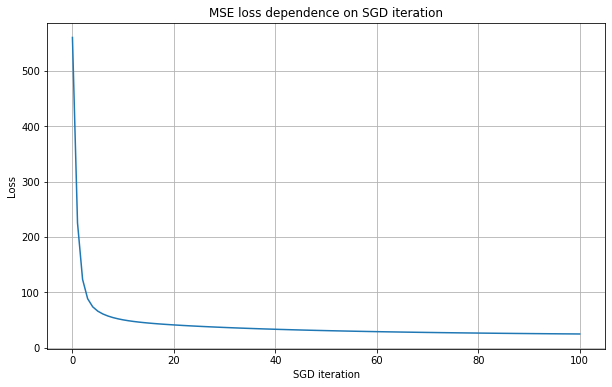

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on SGD iteration')
plt.xlabel('SGD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

Оптимальный размер шага увеличился на несколько порядков, самих "шагов" при этом было сделано больше (100), при этом удалось добиться значительного уменьшения MSE - более, чем в 2 раза.

In [14]:
mse_test = mse_loss(X_test_scaled, y_test, lr_scaled.w)
print(mse_test)
assert mse_test <= 100

36.59949792461683


# Часть 2 

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

Данные можно скачать [тут](https://raw.githubusercontent.com/AKuzina/ml_dpo/main/hw/hw2/train.csv)

In [34]:
data = pd.read_csv('train_hw02.csv', header=0)
data.drop('Id', axis=1, inplace=True)
data.shape

(1460, 80)

In [35]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Задание 1 <a id="task21"></a>

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [36]:
# your code here
columns_nan = []
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col)
        print('Количество пропущенных значений:', data[col].isna().sum())
        print('Доля пропущенных значений: {:.2f}'.format(data[col].isna().sum()/data.shape[0]))
        columns_nan.append(col)

LotFrontage
Количество пропущенных значений: 259
Доля пропущенных значений: 0.18
Alley
Количество пропущенных значений: 1369
Доля пропущенных значений: 0.94
MasVnrType
Количество пропущенных значений: 8
Доля пропущенных значений: 0.01
MasVnrArea
Количество пропущенных значений: 8
Доля пропущенных значений: 0.01
BsmtQual
Количество пропущенных значений: 37
Доля пропущенных значений: 0.03
BsmtCond
Количество пропущенных значений: 37
Доля пропущенных значений: 0.03
BsmtExposure
Количество пропущенных значений: 38
Доля пропущенных значений: 0.03
BsmtFinType1
Количество пропущенных значений: 37
Доля пропущенных значений: 0.03
BsmtFinType2
Количество пропущенных значений: 38
Доля пропущенных значений: 0.03
Electrical
Количество пропущенных значений: 1
Доля пропущенных значений: 0.00
FireplaceQu
Количество пропущенных значений: 690
Доля пропущенных значений: 0.47
GarageType
Количество пропущенных значений: 81
Доля пропущенных значений: 0.06
GarageYrBlt
Количество пропущенных значений: 81
Доля

Есть 4 столбца, в которых пропущено более 80% всех значений, еще в одном столбце пропущена примерно половина значений.

### Задание 2 <a id="task22"></a>

Избавьтесь от пропусков. Заполните пропуски в колонках со значениями типа `object` (это можно проверить методом `.dtype` или `.dtypes`) отдельной категорией 'NaN', а в остальных (типа `float64` и `int64`) - средним по колонке.

Проверьте, что вы действительно избавились от пропусков.

In [37]:
# your code here
X_data = data
for col in X_data[columns_nan].columns:
    if X_data[col].dtypes == 'object':
        X_data[col] = X_data[col].fillna('NaN')
    else:
        X_data[col] = X_data[col].fillna(X_data[col].mean())

X_data.isna().sum().sum()

0

### Задание 3 <a id="task23"></a>

Для каждой колонки, выраженной числами (типа `float64` и `int64`), постройте гистограмму ее значений. Сильно ли отличается масштаб признаков? Отмасштабируйте признаки каким-нибудь методом (например, `StandardScaler` или `MinMaxScaler` из `sklearn`). 

**Не забудьте, что целевая переменная (столбец `'SalePrice'`) не входит в признаки!**

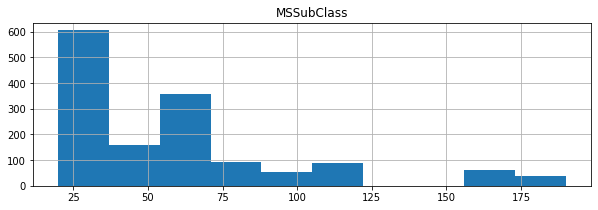

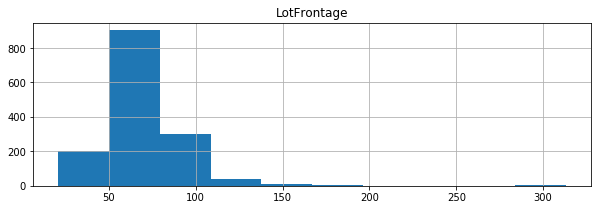

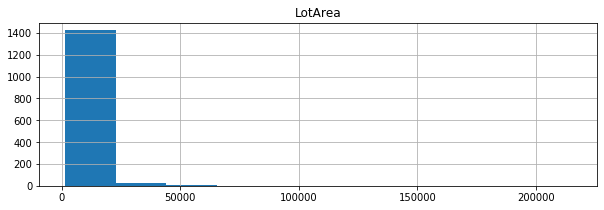

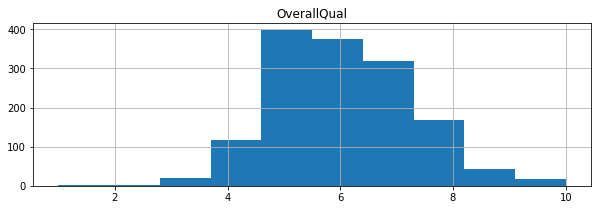

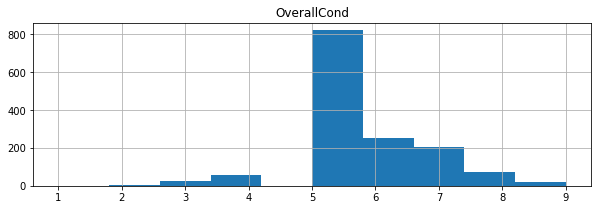

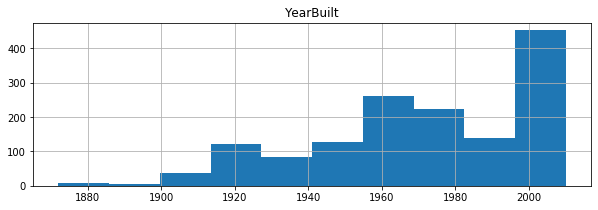

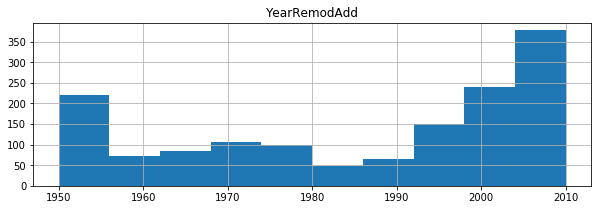

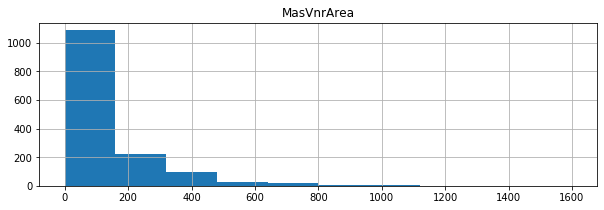

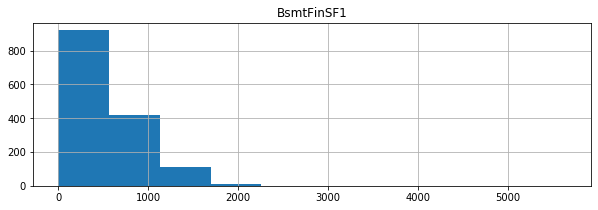

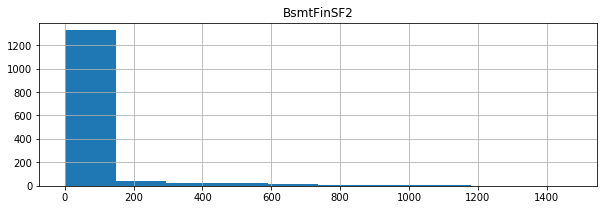

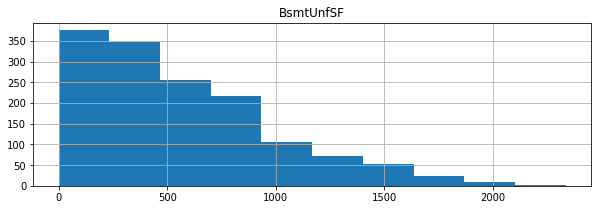

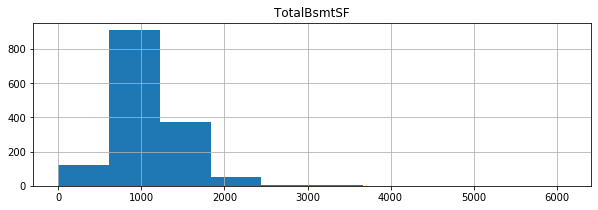

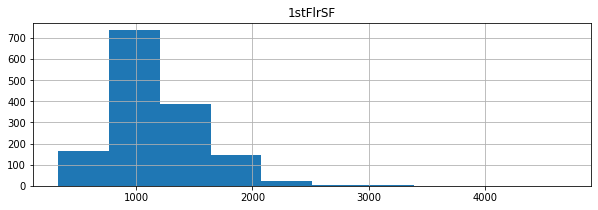

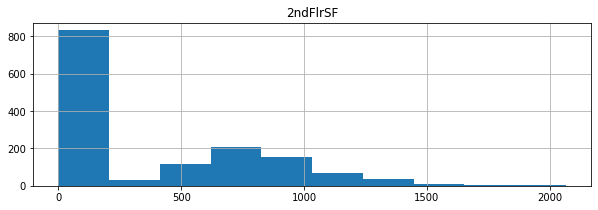

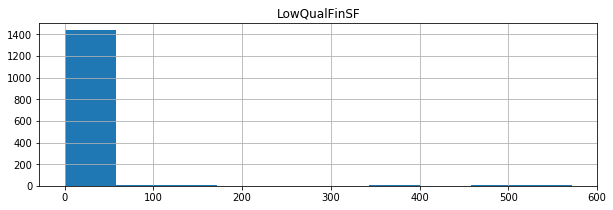

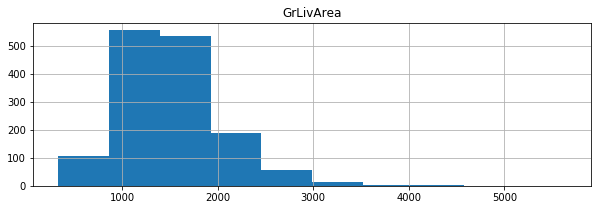

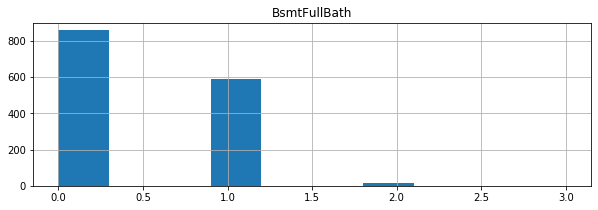

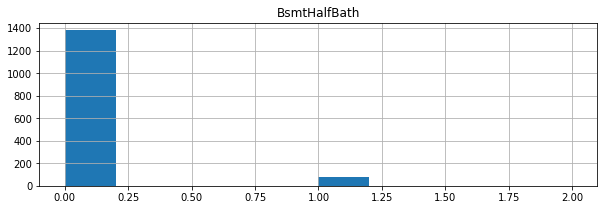

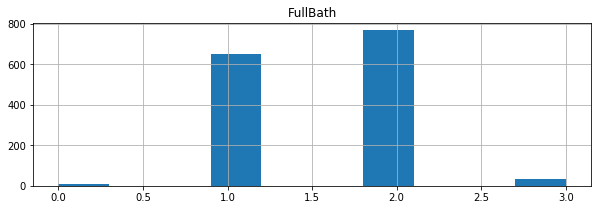

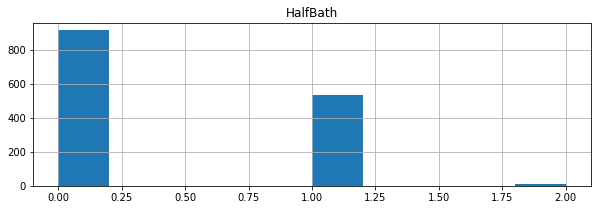

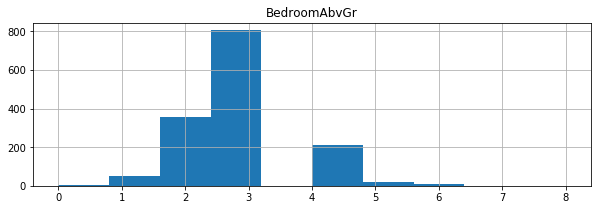

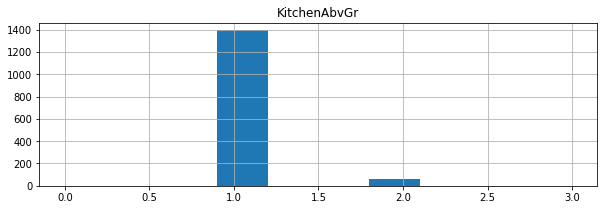

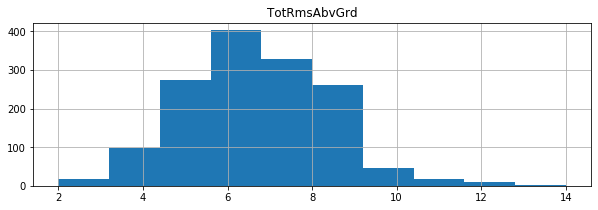

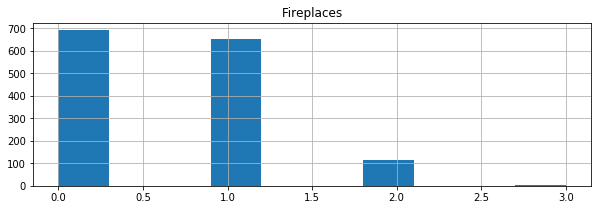

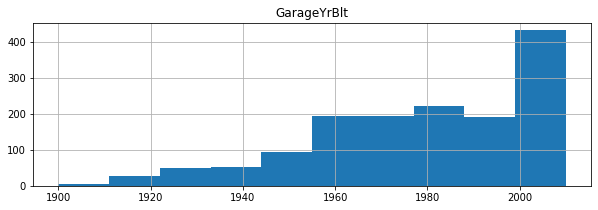

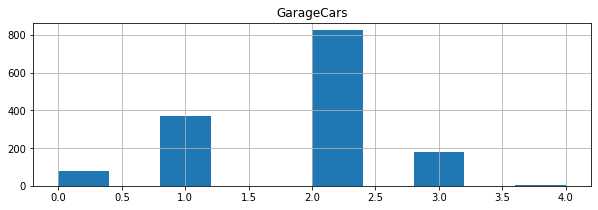

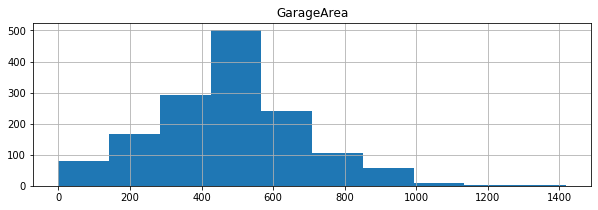

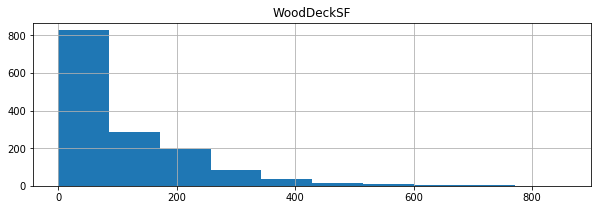

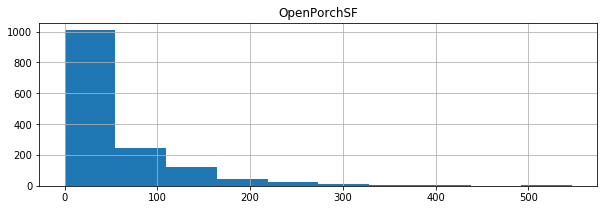

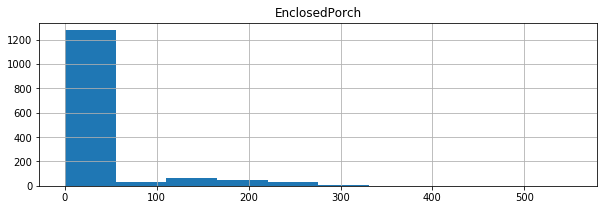

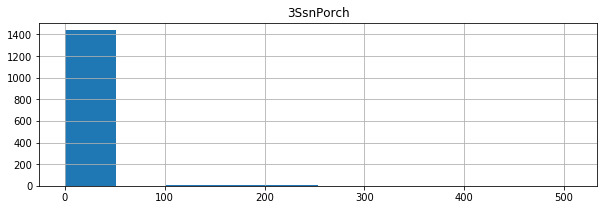

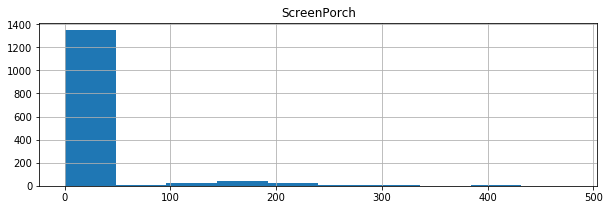

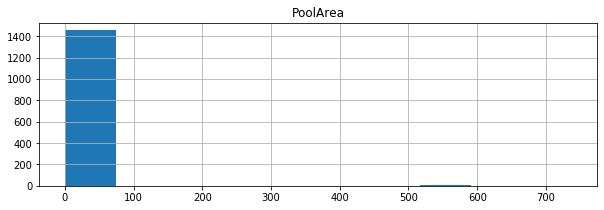

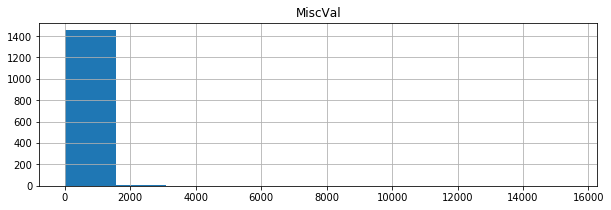

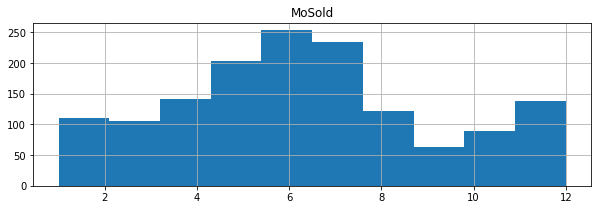

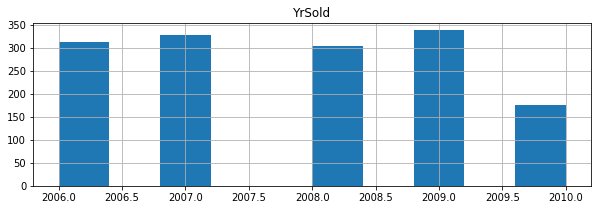

In [38]:
# your code here
for col in X_data.iloc[:, :-1].columns:
    if X_data[col].dtypes == 'float64' or X_data[col].dtypes == 'int64':
        plt.figure(figsize=(10, 3))
        plt.hist(X_data[col])
        plt.title(col)
        plt.grid()
        plt.show()

In [39]:
# Отмасштабируем числовые признаки, используя StandardScaler
Y_data = X_data['SalePrice']
X_data = X_data.drop('SalePrice', axis=1)
scaler = StandardScaler()
obj_mask = (X_data.dtypes == 'object').values
X_norm = scaler.fit_transform(X_data[X_data.columns[~obj_mask]])
X_norm = pd.DataFrame(X_norm, columns=X_data.columns[~obj_mask])
X_norm.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


### Задание 4 <a id="task24"></a>

Обработайте категориальные признаки. Примените к ним one-hot кодирование. Сколько получилось колонок у итогового датасета?

In [40]:
# your code here
X_dum = pd.get_dummies(X_data[X_data.columns[obj_mask]], drop_first=True)
X_fin = pd.concat([X_norm, X_dum, Y_data], axis=1)
X_fin.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0,0,0,1,0,0,0,1,0,208500
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0,0,0,1,0,0,0,1,0,181500
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0,0,0,1,0,0,0,1,0,223500
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0,0,0,1,0,0,0,0,0,140000
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0,0,0,1,0,0,0,1,0,250000


### Задание 5 <a id="task25"></a>

- Постройте гистограмму распределения предсказываемого значения. 
- Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `np.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. 
- Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

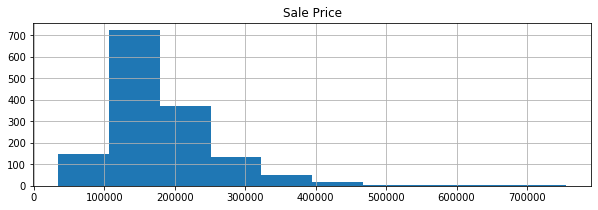

In [41]:
# your code here
plt.figure(figsize=(10, 3))
plt.hist(X_fin['SalePrice'])
plt.title('Sale Price')
plt.grid()
plt.show()

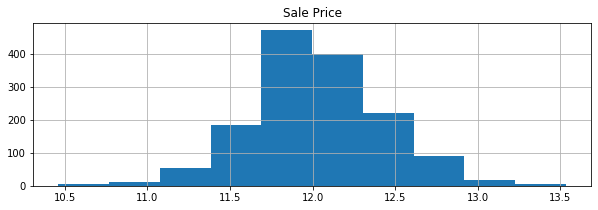

In [42]:
plt.figure(figsize=(10, 3))
plt.hist(np.log1p(X_fin['SalePrice']))
plt.title('Sale Price')
plt.grid()
plt.show()

Распределение целевой переменной, к которой была применена функций np.log1p стало значительно более похожим на нормальное. Разброс значений целевой переменной изменился с примерно 50000-750000 до примерно 10,5-13,5.

---
Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_fin.drop('SalePrice', axis=1), np.log1p(data['SalePrice']), random_state=13)

In [44]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 261), (365, 261), (1095,), (365,))

### Задание 6 <a id="task26"></a>

Перейдем к построению моделей машинного обучения с помощью `sklearn`. Обучите модель линейной регрессии на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error (корень из MSE) на обучающей и валидационной выборках. Что вы наблюдаете? Как вы можете объяснить такой результат?

In [46]:
# your code here
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_val = lin_reg.predict(X_val)
rmse_train = np.mean(((y_pred_train - y_train)**2)**0.5)
rmse_val = np.mean(((y_pred_val - y_val)**2)**0.5)
print('RMSE на обучающей выборке', rmse_train)
print('RMSE на валидационной выборке', rmse_val)

RMSE на обучающей выборке 0.06016727192673148
RMSE на валидационной выборке 11613463.210618405


Видно, что RMSE на обучающейся выборке на много порядков меньше, чем RMSE на валидационной выборке. Скорее всего, наша модель "переобучилась" на тестовой выборке, так как мы никак не страховались от переобучения

### Задание 7 <a id="task27"></a>

Теперь примените методы линейной регрессии с регуляризацией - Lasso (L1) и Ridge (L2). 

Для подбора коэффициента регуляризации будем использовать росс-валидацию (вспомните, что такое кросс-валидация и зачем она нужна). 

`GridSearchCV` - это метод, который перебирает значения гиперпараметров (по заданной «сетке»), считает для каждого качество на кросс-валидации и позволяет выбрать лучший гиперпараметр. Более подробно вы можете познакомиться с методом в [документаци](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

1. Прочитайте документацию `sklearn.model_selection.GridSearchCV`
2. Подбирите оптимальный гиперпараметр для LASSO:
    - В качестве сетки используйте `np.logspace(-5, 1)`
    - Используйте 5-Fold Cross-Validation
3. Используя оптимельное значение гиперпаметра обучите модель на всей обучающей выборке, посчитайте ошибку на тренировочной и обучающей выборках
4. Повторите п. 2-3 для модели Ridge

In [167]:
# пример "сетки"
np.logspace(-5, 1)

array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468e-04, 6.86648845e-04,
       9.10298178e-04, 1.20679264e-03, 1.59985872e-03, 2.12095089e-03,
       2.81176870e-03, 3.72759372e-03, 4.94171336e-03, 6.55128557e-03,
       8.68511374e-03, 1.15139540e-02, 1.52641797e-02, 2.02358965e-02,
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01])

In [ ]:
# your Lasso code here

In [ ]:
# your Ridge code here

### Задание 8 <a id="task28"></a>

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here

``` Опишите свои наблюдения.```

### Задание 9 (Бонус) <a id="task29"></a>


- Скачайте тестовые данные из соревнования [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=test.csv)
- Примените к ним те же шаги предобработки (заполнение пропусков, масштабирование, и т.д.)
- Выберите лучшую модель, которую вам удалось обучить и предскажите с ее помощью цену 
- На забудьте, что ваша модель предсказывает логарифм (см. Задание 5), так что нужно применить обраное преобразование
- Загрузите ваши прогнозы на Kaggle (`Submit Prediction`) и узнайте их точность. 

In [ ]:
# your code here